In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns

In [4]:
import neattext.functions as nxf

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
df = pd.read_csv("emotion_data.csv")

In [10]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [11]:
df['Emotion'].value_counts()

joy         8761
sadness     5278
fear        4267
anger       3398
surprise    3211
neutral     1787
disgust      693
shame        125
Name: Emotion, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

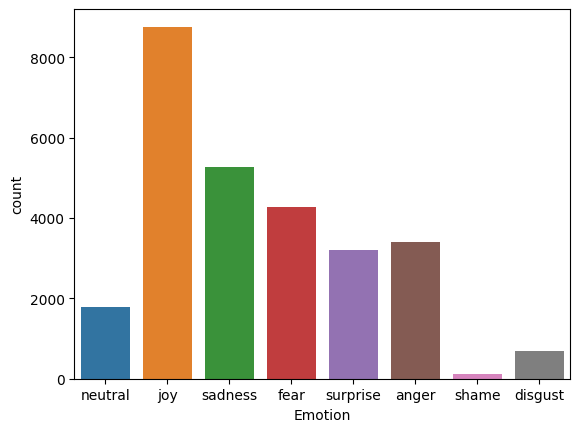

In [13]:
sns.countplot(x='Emotion',data=df)

In [15]:
dir(nxf)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [17]:
df['Clean_Text']= df['Text'].apply(nxf.remove_userhandles)

In [29]:
df['Clean_Text']= df['Clean_Text'].apply(nxf.remove_stopwords)

In [30]:
#df['Clean_Text']= df['Clean_Text'].apply(nxf.remove_special_cha)

In [31]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels,test_size=0.3, random_state=42)

In [33]:
from sklearn.pipeline import Pipeline


In [34]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [35]:
pipe_lr.fit(x_train, y_train)

/Users/neelimarajawat/PycharmProjects/AIM 1.0/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [37]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [36]:
pipe_lr.score(x_test, y_test)

0.6246366279069767

In [38]:
ex1 = "This book is so interesting it made me happy"

In [39]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [40]:
pipe_lr.predict_proba([ex1])

array([[7.51397562e-03, 2.72307687e-03, 8.86218483e-03, 7.34682416e-01,
        7.62716439e-05, 6.40716737e-02, 1.48528063e-04, 1.81921873e-01]])

In [42]:
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [44]:
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_17_March_2023.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()